# m0138 brightest IR lensed galaxy known
5 multiple images, brightest is merging w another image forming giant arc sw of cluster ctr 

'For MRG-M0138, colors were measured on Image 3, which is the most isolated and affords the cleanest photometry. In Table 2, we have scaled these fluxes to match the total observed F160W flux of the brightest image and our spectroscopic target, which is Image 1. (Although there is some ambiguity in separating the merging Images 1 and 2, this only affects the total fluxes in Table 2 and has no consequence for any of the inferred source properties, which will ultimately be scaled based on a model of the source.)'

'All three images consistently show a highly flattened, disk-dominated source. We note that since Images 1 and 2 merge into a giant arc, the southwestern portion of the source is not present in these images.'

'The structures of MRG-M0138 and MRG-M2129 are both dominated by a highly flattened exponential component, i.e., a nearly edge-on disk. Both galaxies also contain additional components. In MRG-M0138, we find a compact rounder component emitting 26% of the luminosity, which is potentially a nascent bulge that is embedded in a very massive and extended (Re = 7 kpc) disk'

In [42]:
from starDust2 import classify
import pickle
import glob,os
import numpy as np
from astropy.io import fits, ascii
import astropy
from astropy.table import Table,vstack
import sncosmo
import sfdmap
import pierel_util
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys  
sys.path.insert(0, 'py/')
import LOSS_galsnid_posteriors
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Ob0=0.05)
from scipy.integrate import quad
%matplotlib inline

In [22]:
table1 = ascii.read('table1.txt') # position, z
table2 = ascii.read('table2.txt') # phot
table3 = ascii.read('table3.txt') # spec
table4 = ascii.read('table4.txt') # sersic I(R) smaller n ~ less concentrated shallower slope small R
table5 = ascii.read('table5.txt') # mass, sfr, stellar pop ~ age, metallicity
sed = fits.open('host_image2_sed.fits')
host_image = fits.open('host_image2_template.fits')

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

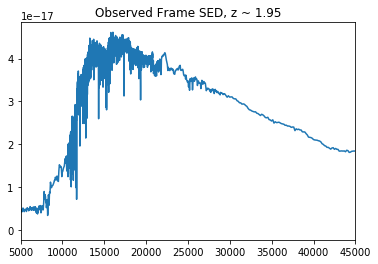

In [64]:
wave_angstrom = [host_image[1].data[i][0] for i in range(len(host_image[1].data))] 
fluxnu = [host_image[1].data[i][1] for i in range(len(host_image[1].data))] # 'Angstrom-1 cm-2 erg s-1' 
plt.plot(wave_angstrom,fluxnu)
plt.xlim(5000,45000)
plt.title('Observed Frame SED, z ~ 1.95')
print(host_image[0].header,host_image[1].header)

1.95 45.889869553896034 mag 15065165630.248405
51656413402603.4 254949666450700.78
-25.38274500031664 -27.1160704980145 1.7333254976978623


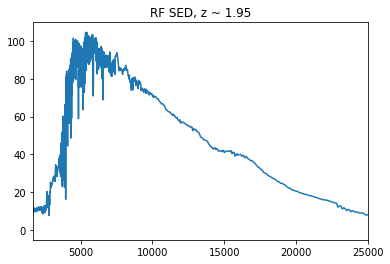

In [65]:
# K and B-K
# eff -----> fwhm
# B ~ 445 nm	94 nm
# K ~ 2190 nm	390 nm

mu = cosmo.distmod(z)
d = 10**((mu.value+5)/5) # mu ~ 5log10(d) - 5
print(z,mu,d)

# [Y erg/cm^2/s/A] = 2.99792458E-05 * [X1 Jy] / [X2 A]^2
def M(fnu,zp = 3631): # fnu give in jansky
    return -2.5*np.log10(fnu/zp)

z = 1.95
# do the shifts to rest frame wavelength and flux densities
wave_angstrom = [host_image[1].data[i][0] for i in range(len(host_image[1].data))] 
wave_angstrom = np.array(wave_angstrom)/(1+z)
fluxnu = [host_image[1].data[i][1] for i in range(len(host_image[1].data))] # 'Angstrom-1 cm-2 erg s-1' 
fluxnu = np.array(fluxnu)*(d/10)**2
plt.plot(wave_angstrom,fluxnu)
plt.xlim(5000/(1+z),25000)
plt.title('RF SED, z ~ 1.95')

# flux density at rf B & K wavelengths
Beff,Keff = 4450,21900
B_idx = min(range(len(wave_angstrom)), key=lambda i: abs(wave_angstrom[i]-Beff))
K_idx = min(range(len(wave_angstrom)), key=lambda i: abs(wave_angstrom[i]-Keff))
fnu_rfB = fluxnu[B_idx]
fnu_rfK = fluxnu[K_idx]
fnu_rfB = fnu_rfB*(1/2.99792458E-05)*Beff**2 # jy
fnu_rfK = fnu_rfK*(1/2.99792458E-05)*Keff**2 
B = M(fnu_rfB)
K = M(fnu_rfK)
print(fnu_rfB,fnu_rfK)
print(B,K,B-K)

In [66]:
"""
# params should be a list [eo,MK,color,hubbletype], dont have one put -99.0
eo,MK,color(B-K),HubbleType=params
morphology has likelihoods for elliptical,lenticular,spiral,irregular
hubbletype~[funclassifiable,fps,fsphere,fdisk,firr,fds,fspiral,fbar,ftidalarms,fDiskDom,fBulgeDom]
fraction of classifiers who selected the parameter (Kartaltepe et al 15) 
"""

eo,MK,color=-99.0,K,B-K
# this is a lenticular galaxy ~ fds = 1
hubbletype = [0,0,0,0,0,1,0,0,0,0,0]
params = [eo,MK,color,hubbletype]
LOSS_galsnid_posteriors.galsnid(params,prior=0.5)

[(0.3986828344498149+/-0.1074898594004479,
  0.3986828344498149+/-0.07797716916142737),
 (0.6013171655501851+/-0.10748985940044793,
  0.6013171655501851+/-0.07797716916142737),
 [2, 3]]